In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [40]:
df = pd.read_csv('wine_data.csv',header = None ,usecols= [0,1,2])
df.columns = ['Class','Alcohol' , 'Malic']
df

,Class,Alcohol,Malic
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Malic', ylabel='Density'>

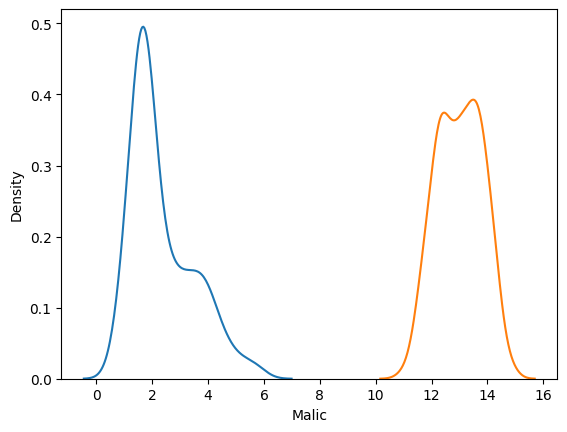

In [41]:
sns.kdeplot(df['Malic'])
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Count'>

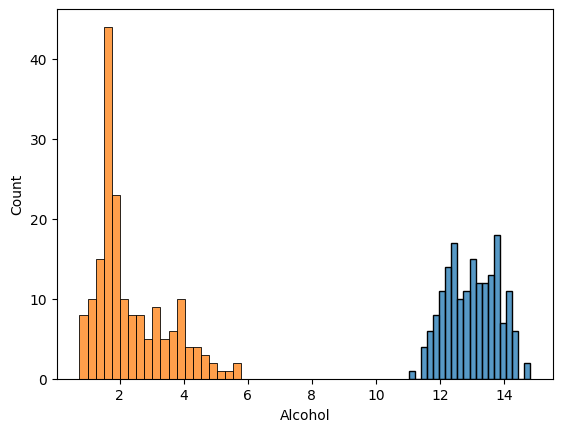

In [42]:
sns.histplot(df['Alcohol'],bins=20)
sns.histplot(df['Malic'],bins = 20)

<Axes: xlabel='Alcohol', ylabel='Malic'>

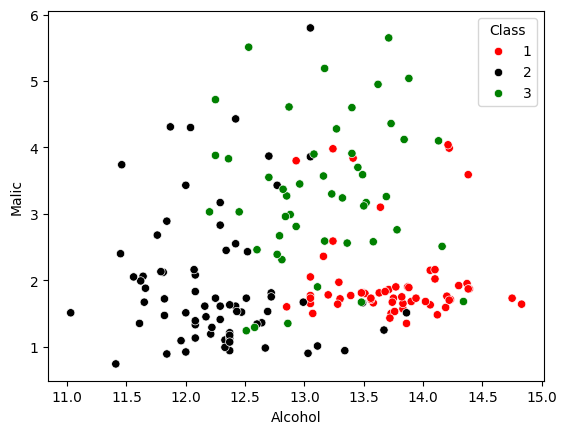

In [43]:
test = {1:'red' , 2:'black',3:'green'}
sns.scatterplot(x = 'Alcohol' , y = 'Malic' , hue = 'Class' , data = df , palette = test)

In [44]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Class' , axis = 1) , df['Class'] , test_size = 0.3 , random_state= 0)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(124, 2)
(54, 2)
(124,)
(54,)


In [46]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

In [48]:
np.round(x_train.describe())

,Alcohol,Malic
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [49]:
np.round(x_train_scaled.describe())

,Alcohol,Malic
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


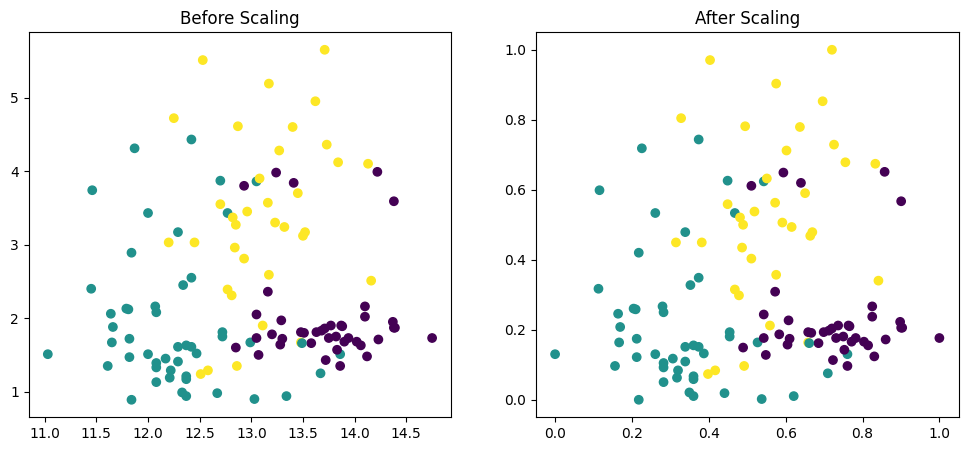

In [51]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Alcohol'], x_train['Malic'], c = y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic'] , c = y_train)
ax2.set_title("After Scaling")
plt.show()

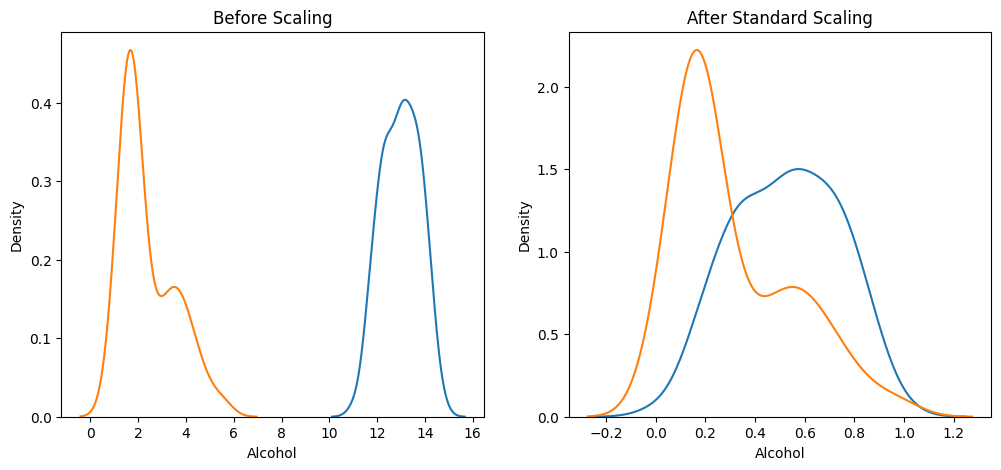

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic'], ax=ax2)
plt.show()

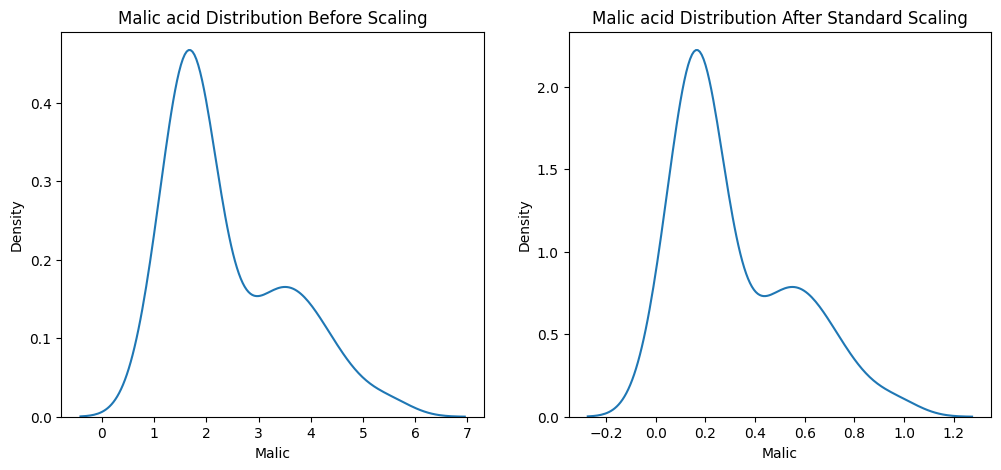

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['Malic'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Malic'], ax=ax2)
plt.show()